In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import h5py

import scipy.io
import cv2

import numpy as np
import copy
import pandas as pd
import os

In [8]:
pathImgs = ["D:/Datasets/CharALL/English/Img/GoodImg/Bmp/",
            "D:/Datasets/CharALL/English/Fnt/",
            "D:/Datasets/CharALL/English/Hnd/Img/"]

## Cargado de los datos

In [9]:
data = []
labels = []
total_labels = np.arange(0,62)

In [ ]:
img_dirs = [x+'/' for x in os.listdir(pathImgs[0])]
label_cont = 0

for d in img_dirs:
    imgs = os.listdir(pathImgs[0]+d)
    for img in imgs:
        data.append(cv2.imread(pathImgs[0]+d+img))
        labels.append(total_labels[label_cont])
    label_cont += 1

In [ ]:
img_dirs = [x+'/' for x in os.listdir(pathImgs[1])]
label_cont = 0

for d in img_dirs:
    imgs = os.listdir(pathImgs[1]+d)
    for img in imgs:
        data.append(cv2.imread(pathImgs[1]+d+img))
        labels.append(total_labels[label_cont])
    label_cont += 1

In [ ]:
img_dirs = [x+'/' for x in os.listdir(pathImgs[2])]
label_cont = 0

for d in img_dirs:
    imgs = os.listdir(pathImgs[2]+d)
    for img in imgs:
        data.append(cv2.imread(pathImgs[2]+d+img))
        labels.append(total_labels[label_cont])
    label_cont += 1

### Procesado de los datos
Hay que reescalar las imagenes porque tienen dimensiones diferentes

In [ ]:
data = [cv2.resize(im, (64,64)) for im in data]
data = np.array(data)

In [ ]:
plt.imshow(data[60000])
plt.show()
print(labels[60000])

### Train y test con sklearn

In [43]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [44]:
y_train = np.array(y_train)
y_test = np.array(y_test)

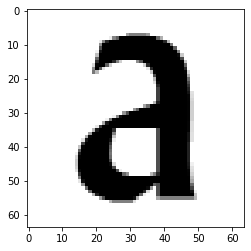

(59285, 64, 64, 3)

In [45]:
plt.imshow(x_train[5])
plt.show()
x_train.shape

In [46]:
model = keras.Sequential([
    keras.layers.Conv2D(128, 3, 3, input_shape=(64,64,3), activation='relu'),
    keras.layers.Conv2D(256, 2, 1, activation='relu'),
    keras.layers.Conv2D(512, 2, 1, activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(62),
    keras.layers.Activation('softmax')
])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1853/1853 [==============================] - 760s 410ms/step - loss: 5.2485 - accuracy: 0.4587
Epoch 2/20
1853/1853 [==============================] - 716s 387ms/step - loss: 0.8736 - accuracy: 0.7430
Epoch 3/20
1853/1853 [==============================] - 744s 401ms/step - loss: 0.7081 - accuracy: 0.7777
Epoch 4/20
1853/1853 [==============================] - 719s 388ms/step - loss: 0.6273 - accuracy: 0.7991
Epoch 5/20
1853/1853 [==============================] - 684s 369ms/step - loss: 0.5515 - accuracy: 0.8202
Epoch 6/20
1853/1853 [==============================] - 684s 369ms/step - loss: 0.5033 - accuracy: 0.8330
Epoch 7/20
1853/1853 [==============================] - 710s 383ms/step - loss: 0.4705 - accuracy: 0.8426
Epoch 8/20
1853/1853 [==============================] - 707s 381ms/step - loss: 0.4306 - accuracy: 0.8525
Epoch 9/20
1853/1853 [==============================] - 751s 406ms/step - loss: 0.4171 - accuracy: 0.8563
Epoch 10/20
1853/1853 [=======================

In [49]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

464/464 - 36s - loss: 0.3864 - accuracy: 0.8703

Test accuracy: 0.8702604174613953


In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 21, 21, 128)       3584      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 256)       131328    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 19, 19, 512)       524800    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 512)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              42468352  
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)             

In [51]:
model.save("textRecognitionModel_V2")

INFO:tensorflow:Assets written to: textRecognitionModel_V2\assets
